  0.727832 seconds (1.84 M allocations: 179.421 MiB, 36.65% gc time)


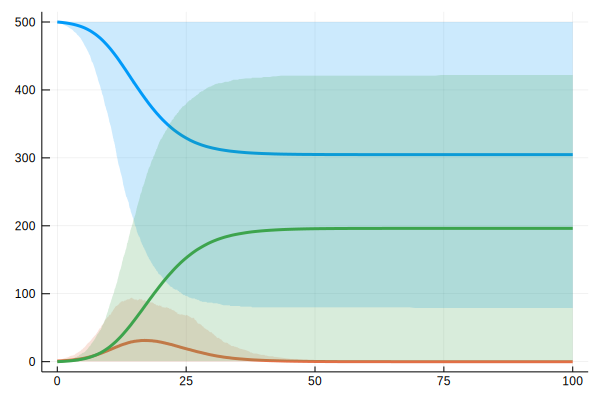

In [27]:
using DiffEqBiological
using DifferentialEquations
using Plots
using DiffEqMonteCarlo

rateInfect(u,p,t) = p[1]*u[1]*u[2]/(u[1]+u[2]+u[3])
function eventInfect!(integrator)
  integrator.u[1] -= 1
  integrator.u[2] += 1
end
jump1 = ConstantRateJump(rateInfect,eventInfect!)

rateRecover(u,p,t) = p[2]*u[2]
function eventRecover!(integrator)
  integrator.u[2] -= 1
  integrator.u[3] += 1
end
jump2 = ConstantRateJump(rateRecover,eventRecover!)

u0 = [500.0; 1.0; 0.0]
tspan = (0.0,100.0)
p = (2.0 * 1.0/3.0, 1.0/3.0)
prob = DiscreteProblem(u0,tspan,p)
jump_prob = JumpProblem(prob,Direct(),jump1,jump2)
#sol = solve(jump_prob,FunctionMap())
monte_prob = MonteCarloProblem(jump_prob)
@time sol_monte = solve(monte_prob, num_monte=1000)
summ = EnsembleSummary(sol_monte)
plot(summ)
#plot(sol)

EnsembleSolution Solution of length 5 with uType:
ODESolution{Float64,2,Array{Array{Float64,1},1},Nothing,Nothing,Array{Float64,1},Array{Array{Array{Float64,1},1},1},DiscreteProblem{Array{Float64,1},Tuple{Float64,Float64},true,Tuple{Float64,Float64},DiscreteFunction{true,getfield(DiffEqBase, Symbol("##152#153")),Nothing,Nothing},Nothing},FunctionMap{false},OrdinaryDiffEq.InterpolationData{DiscreteFunction{true,getfield(DiffEqBase, Symbol("##152#153")),Nothing,Nothing},Array{Array{Float64,1},1},Array{Float64,1},Array{Array{Array{Float64,1},1},1},OrdinaryDiffEq.FunctionMapCache{Array{Float64,1},Array{Float64,1}}},DiffEqBase.DEStats}